In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression

print("All imports ready!")

All imports ready!


In [2]:
df = pd.read_csv('../../data/raw/shopping_trends.csv')
df.head(3)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly


In [3]:
df.isna().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [4]:
features = ['Age', 'Review Rating', 'Previous Purchases']
target = ['Purchase Amount (USD)']

X = df[features]
y= df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = LinearRegression()
model.fit(X_train, y_train)
print("Model trained!")

Model trained!


In [5]:
predictions = model.predict(X_test)

print(f"Predictions Shape: {predictions.shape}")
print(f"First 5 Predictions:\n {predictions[:5]}")
print(f"First 5 Actual:\n {y_test[:5].values}")

Predictions Shape: (780, 1)
First 5 Predictions:
 [[59.06571282]
 [59.71102428]
 [61.02869825]
 [59.2020532 ]
 [60.60404   ]]
First 5 Actual:
 [[31]
 [50]
 [36]
 [72]
 [38]]


In [7]:
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"R2 Score: {r2:.3f}")
print(f"MAE: ${mae:.3f}")
print(f"RMSE: ${rmse:.3f}")

R2 Score: -0.005
MAE: $20.716
RMSE: $23.712


In [8]:
import sklearn
print(sklearn.__version__)

1.6.1


In [10]:
# Just to confirm your hypothesis
print(f"Mean purchase: ${y.mean().values[0]:.2f}")
print(f"Std purchase: ${y.std().values[0]:.2f}")
print(f"Min/Max: ${y.min().values[0]:.2f} / ${y.max().values[0]:.2f}")

Mean purchase: $59.76
Std purchase: $23.69
Min/Max: $20.00 / $100.00


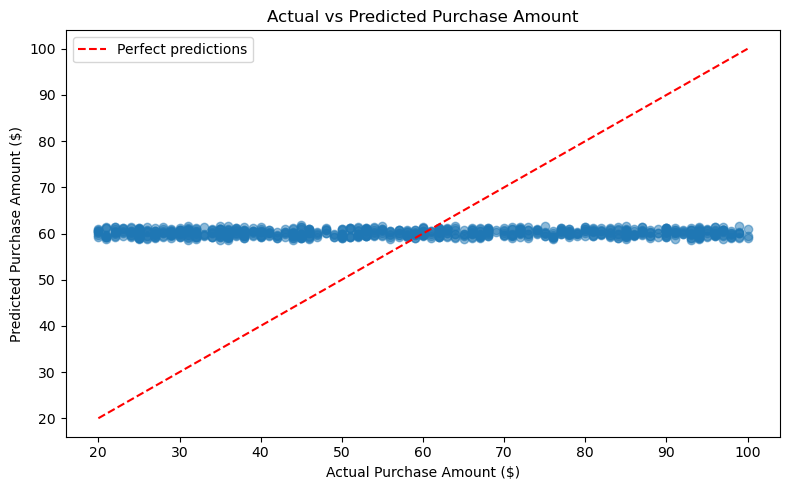

In [12]:
# Pattern
plt.figure(figsize=(8,5))
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect predictions')
plt.xlabel('Actual Purchase Amount ($)')
plt.ylabel('Predicted Purchase Amount ($)')
plt.title('Actual vs Predicted Purchase Amount')
plt.legend()
plt.tight_layout()
plt.show()

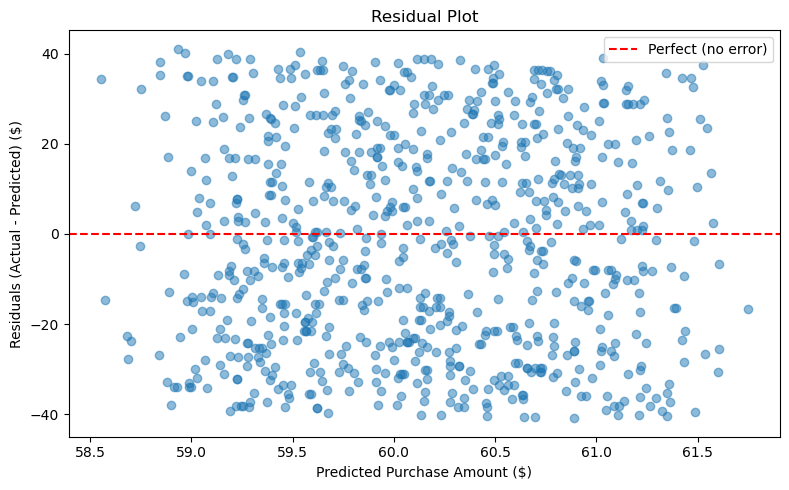

In [14]:
# Calculate residuals
residuals = y_test.values - predictions

# Create plot
plt.figure(figsize=(8,5))
plt.scatter(predictions, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', label='Perfect (no error)')
plt.xlabel('Predicted Purchase Amount ($)')
plt.ylabel('Residuals (Actual - Predicted) ($)')
plt.title('Residual Plot')
plt.legend()
plt.tight_layout()
plt.show()

## Model Performance Summary

**Metrics:**
- R²: -0.005 - This tells me the model is basically just guessing the mean for every prediction. DO NOT DEPLOY
- MAE: $20.716 - Every prediction is, on average, off by 21 dollars. So, on a price list that ranges from 20-100 dollars, this is a huge margin of error. Unusable model.
- RMSE: $23.712 - This is really close to the MAE value, so, there are likely no large outliers in the data.

**Diagnostic Assessment:**
- Residual pattern: Almost a perfect square of dots evenly distributed across the graph. So, almost every prediction was wrong.
- Outliers: no
- Model strength: In the records where a customer purchased something at the average price, the model guessed it.
- Model weakness: Model is effectively a total failure. Needs categorical features instead of the existing numerical selections.

**Business Recommendation:**
Based on our findings, this model is not ready for deployment. It requires a different set of features to be trained on, in order to more accurately predict the target.